In [1]:
import cv2
import numpy as np

In [2]:
def preprocess_image(image):

    # Apply Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply morphological operations to clean the image
    kernel = np.ones((3, 3), np.uint8)  # Adjust kernel size as needed
    opened_image = cv2.morphologyEx(blurred_image, cv2.MORPH_OPEN, kernel)  # Erosion followed by dilation

    return opened_image

In [3]:
import os

In [4]:
from matplotlib import pyplot as plt

GET Image and Preprocess

In [5]:
# image_path = 'downloaded_images/Landscape/20240416_140042.jpg'
image_path = 'downloaded_images/Landscape/20240418_192412.jpg'
# image_path = 'downloaded_images/Landscape/20240423_062009.jpg'
base_name = os.path.basename(image_path)
file_name, _ = os.path.splitext(base_name)

target_image = cv2.imread(image_path)
if target_image is None:
    raise ValueError("Invalid image path or unable to read image.")

# display_image(target_image, 'Original Image',
#                   save_image=False, save_path=None, filename=None)
preprocessed_image = preprocess_image(target_image)

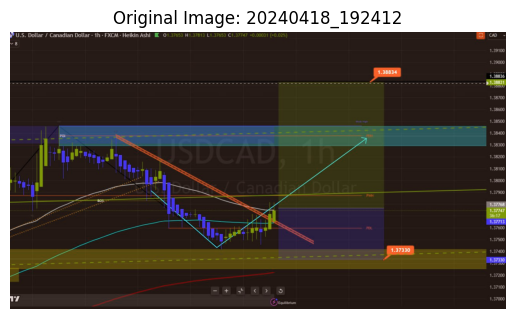

In [6]:
# Convert BGR to RGB for displaying in matplotlib
# target_image_rgb = cv2.cvtColor(preprocessed_image, cv2.COLOR_BGR2RGB)

# Display the image in the Jupyter notebook
plt.imshow(target_image)
plt.title(f"Original Image: {file_name}")
plt.axis('off')  # Hide axes for a cleaner display
plt.show()

In [7]:
print("Current working directory:", os.getcwd())

Current working directory: /Users/paul/Sites/ForexTrading/ForexSignals


In [8]:
# from utils.display import display_image, display_mask
from display import display_image, display_mask

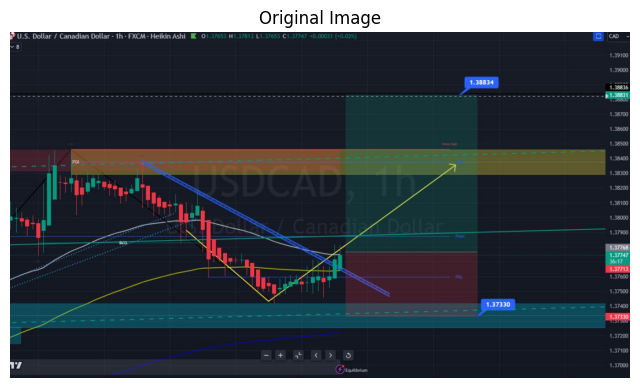

In [9]:
display_image(target_image, 'Original Image',
                      save_image=False, save_path=None, filename=None)

In [10]:
import shutil

Classify Aspect Ratio

In [11]:
def classify_aspect_ratio(width, height):
    aspect_ratio = width / height
    
    # Define aspect ratio categories
    if aspect_ratio > 1.1:
        return "Landscape"  # Wider than tall
    elif aspect_ratio < 0.9:
        return "Portrait"  # Taller than wide
    else:
        return "Square"  # Approximately equal width and height

Move Images To Correct Folder

In [12]:
# Folder containing the image files
# folder_path = 'downloaded_images'

# # Loop through all image files in the folder
# for filename in os.listdir(folder_path):
#     if filename.endswith(('.jpg', '.jpeg', '.png')):
#         # Read the image
#         image_path = os.path.join(folder_path, filename)
#         image = cv2.imread(image_path)
        
#         # Get image dimensions
#         height, width, _ = image.shape
        
#         # Classify aspect ratio
#         aspect_class = classify_aspect_ratio(width, height)
        
#         # Define the destination folder based on aspect ratio classification
#         destination_folder = os.path.join(folder_path, aspect_class)
        
#         # Create the subfolder if it doesn't exist
#         os.makedirs(destination_folder, exist_ok=True)
        
#         # Define the new path for the image
#         new_image_path = os.path.join(destination_folder, filename)
        
#         # Move the image to the appropriate folder
#         shutil.move(image_path, new_image_path)
        
#         # Output the movement result
#         print(f"Moved {filename} to {new_image_path}")

In [13]:
def check_background_color(image):
    # Flatten the image into a single array of pixels
    flattened_pixels = image.reshape((-1, 3))

    # Calculate the mean color across the image
    mean_color = np.mean(flattened_pixels, axis=0)

    # Set a threshold to distinguish between black and white
    threshold = 127  # The midpoint for 8-bit colors

    # Determine if the mean color is predominantly black or white
    if np.all(mean_color < threshold):
        return "Black"
    elif np.all(mean_color > threshold):
        return "White"
    else:
        return "Mixed"

In [14]:
background = check_background_color(target_image)

In [15]:
background

'Black'

In [16]:
# from utils.process_white_background import process_white_background
# from utils.process_black_background import process_black_background
from process_white import process_white_background
from process_black import process_black_background

Black


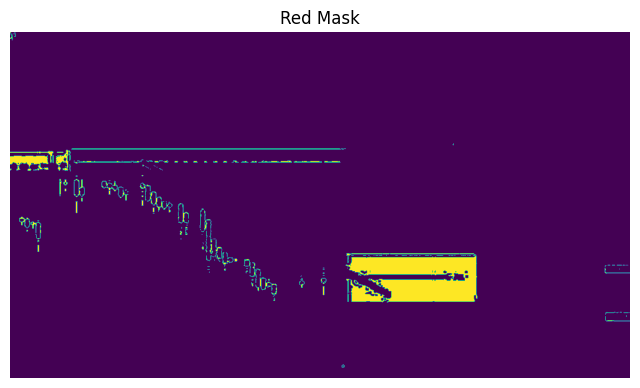

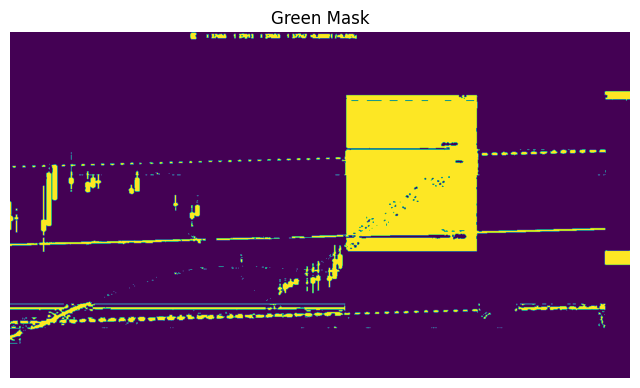

Contour | Center X | Top Edge Y | Width | Leftmost X | Top Left | Top Right | Bottom Left | Bottom Right | Area
---------------------------------------
1     | 735.50     | 524     | 61.00    |705.00     | (705, 524)     | (766, 524)     | (705, 558)     | (766, 558)     | 1295.50
2     | 834.00     | 465     | 258.00    |705.00     | (705, 465)     | (963, 465)     | (705, 558)     | (963, 558)     | 16958.50
3     | 596.00     | 582     | 16.00    |588.00     | (588, 582)     | (604, 582)     | (588, 588)     | (604, 588)     | 73.50
4     | 575.00     | 582     | 16.00    |567.00     | (567, 582)     | (583, 582)     | (567, 590)     | (583, 590)     | 95.50
5     | 554.00     | 582     | 16.00    |546.00     | (546, 582)     | (562, 582)     | (546, 589)     | (562, 589)     | 81.00
6     | 528.50     | 582     | 25.00    |516.00     | (516, 582)     | (541, 582)     | (516, 591)     | (541, 591)     | 129.00
7     | 616.00     | 581     | 14.00    |609.00     | (609, 581)     | (6

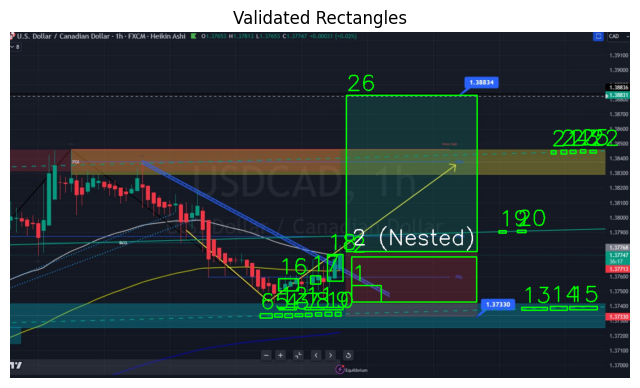

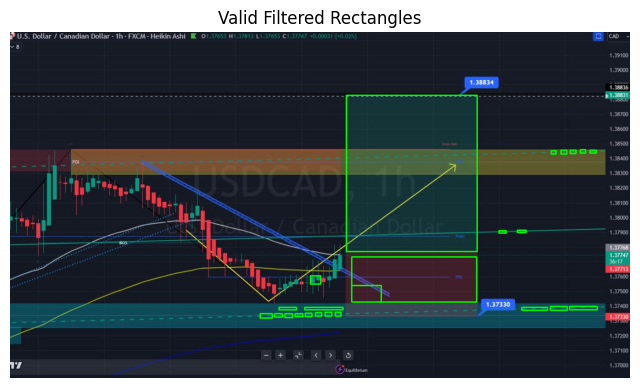

Most Rectangular Contour Number: None
Aligned Contours:
Contour 5 is aligned with Contour 12
Contour 12 is aligned with Contour 4
Contour 7 is aligned with Contour 17
Contour 17 is aligned with Contour 8
Contour 26 is aligned with Contour 2
Contour 20 is aligned with Contour 13
Contour 14 is aligned with Contour 21
Contour 15 is aligned with Contour 23


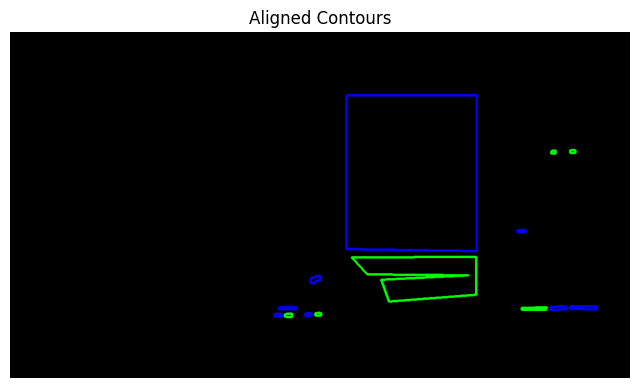

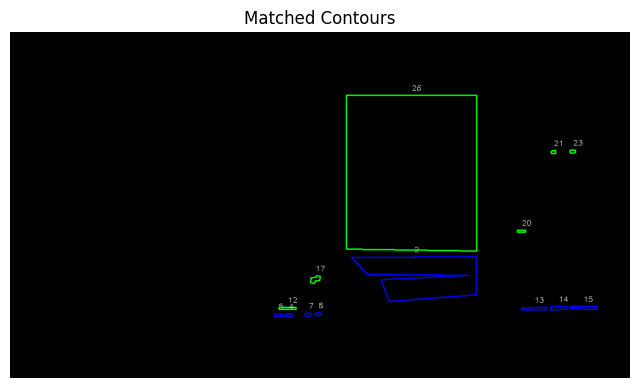

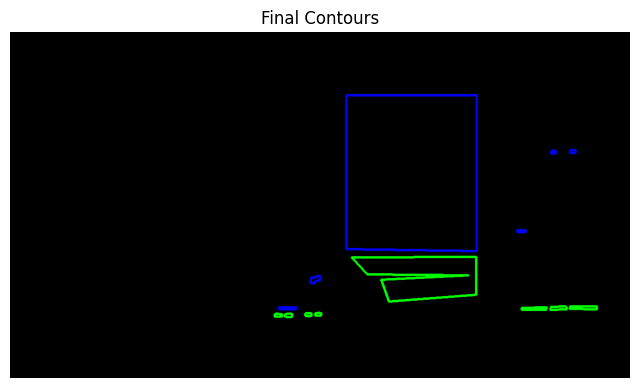

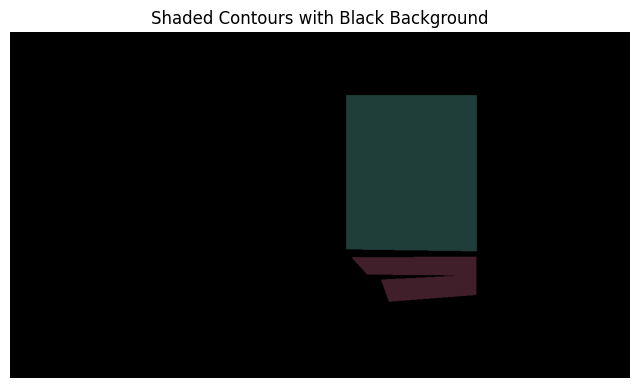

long
long


In [17]:
print(background)
if background == 'Black':
    position = process_black_background(preprocessed_image, target_image)
else:
    position = process_white_background(preprocessed_image, file_name)

print(position)

In [18]:
position

'long'

In [19]:
base_folder = 'classified_images'  # Root folder for classified images
target_folder = os.path.join(base_folder, position)  # Folder based on position

# Ensure the target folder exists
os.makedirs(target_folder, exist_ok=True)

# New file path in the target folder
new_image_path = os.path.join(target_folder, base_name)

# Move the file
shutil.move(image_path, new_image_path)

print(f"Moved image to: {new_image_path}")

Moved image to: classified_images/long/20240418_192412.jpg
